In [1]:
%matplotlib inline
import h5py
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

sns.set_theme('notebook', style='whitegrid', palette='muted', font_scale=1.25)

In [2]:
base_path = Path(os.path.dirname(os.getcwd())) / 'bes-edgeml-models/turbulence_regime_classification/'
labeled_data = Path(base_path) / 'data/labeled_datasets'

In [39]:
sn = '149992'
hf = h5py.File(labeled_data / f'bes_signals_{sn}_labeled.hdf5', 'r')
signals = np.array(hf['signals'], dtype=np.float32)
times = np.array(hf['time'])
t_shifted = (times - 800.000).astype(float)
labels = np.array(hf['labels'], dtype=np.int32)

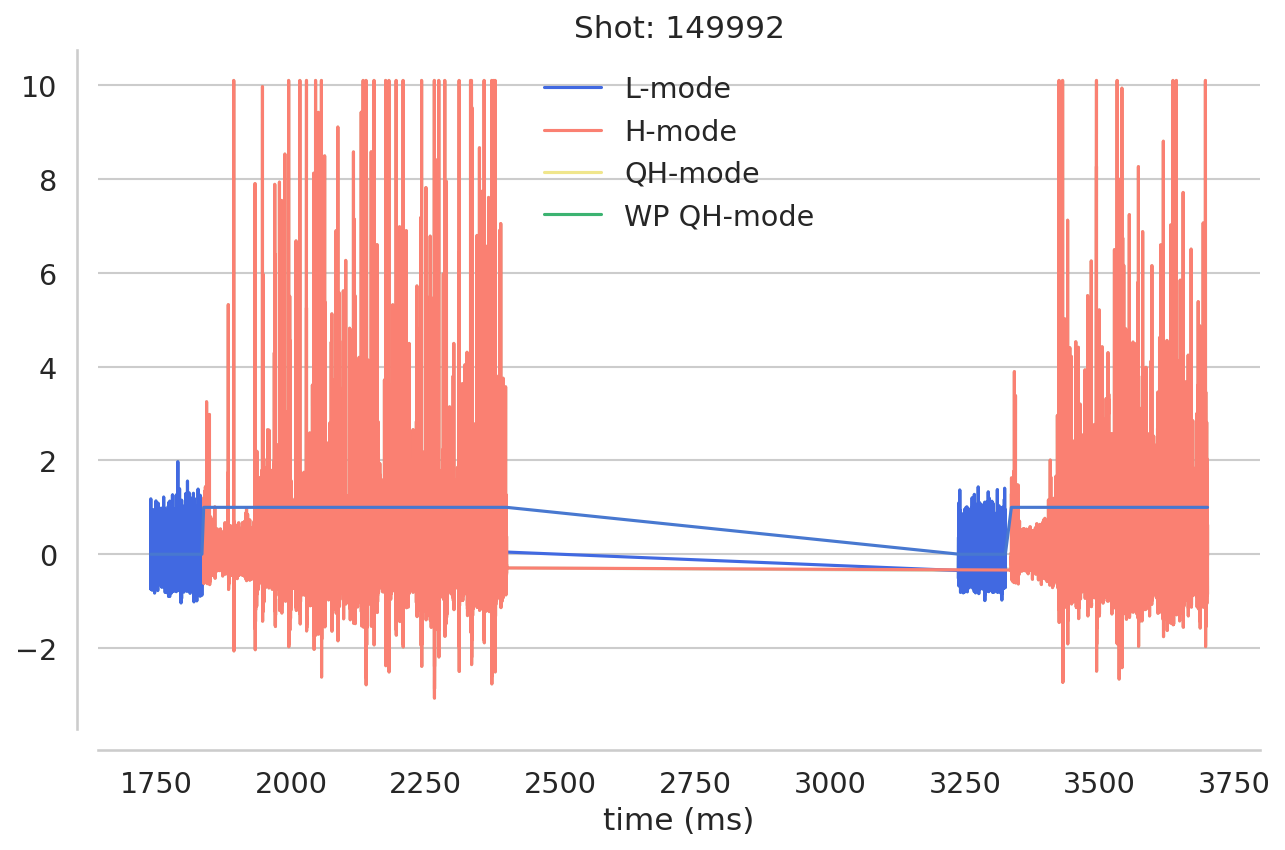

In [40]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(t_shifted, signals[21, :], c='green', alpha=0.2)
plt.plot(t_shifted[labels == 0], signals[21, labels == 0], label='L-mode', c='royalblue')
plt.plot(t_shifted[labels == 1], signals[21, labels == 1], label='H-mode', c='salmon')
plt.plot(t_shifted[labels == 2], signals[21, labels == 2], label='QH-mode', c='khaki')
plt.plot(t_shifted[labels == 3], signals[21, labels == 3], label='WP QH-mode', c='mediumseagreen')
plt.plot(t_shifted, labels)
plt.legend(frameon=False)
plt.title(f'Shot: {sn}')
plt.xlabel('time (ms)')
sns.despine(top=True, right=True, offset=10)
plt.grid(axis='x')
plt.show()